In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('comprovantes_pix_10000_anomalias.csv', sep=';')

print(df.head())

                             EndToEndId             DataHora    Valor Moeda  \
0  f094cb2c-2a73-463c-b60e-0c57262051e4  2025-06-26 21:07:56  4658.86   BRL   
1  f0409769-741f-49bd-811a-3842cc8f54db  2025-06-23 17:47:56  3184.72   BRL   
2  c1d22287-d343-4c91-b03d-dbe9a69695b3  2025-06-27 15:58:56  1054.48   BRL   
3  254423a9-50b7-41b1-a099-e8cf6232bab4  2025-07-15 13:59:56  3564.76   BRL   
4  f1c5e3e7-bc62-4f18-91e3-c8f92aebdd59  2025-06-23 06:19:56    15.16   BRL   

           Pagador_Nome    Pagador_CPF_CNPJ     Pagador_Banco  \
0        Nathan Cardoso  13.253.967/0001-95       BTG Pactual   
1       Benjamin Barros      781.515.544-64   Banco do Brasil   
2          Lorena Cunha      444.922.709-96       Banco Inter   
3      Sra. Luana Pinto      468.153.904-62       Banco Safra   
4  João Miguel da Cunha  83.407.726/0001-68  Santander Brasil   

         Recebedor_Nome  Recebedor_CPF_CNPJ          Recebedor_Banco  \
0     Ana Beatriz Ramos      901.361.580-95                   

# Análise Exploratória Inicial



===== Informações Gerais do Dataset =====
<class 'pandas.core.frame.DataFrame'>
Index: 9976 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EndToEndId          9976 non-null   object        
 1   DataHora            9976 non-null   object        
 2   Valor               9976 non-null   float64       
 3   Moeda               9976 non-null   object        
 4   Pagador_Nome        9976 non-null   object        
 5   Pagador_CPF_CNPJ    9976 non-null   object        
 6   Pagador_Banco       9976 non-null   object        
 7   Recebedor_Nome      9976 non-null   object        
 8   Recebedor_CPF_CNPJ  9976 non-null   object        
 9   Recebedor_Banco     9976 non-null   object        
 10  ChavePix_Utilizada  9976 non-null   object        
 11  TipoChave           9976 non-null   object        
 12  Descricao           9976 non-null   object        
 13  Status   

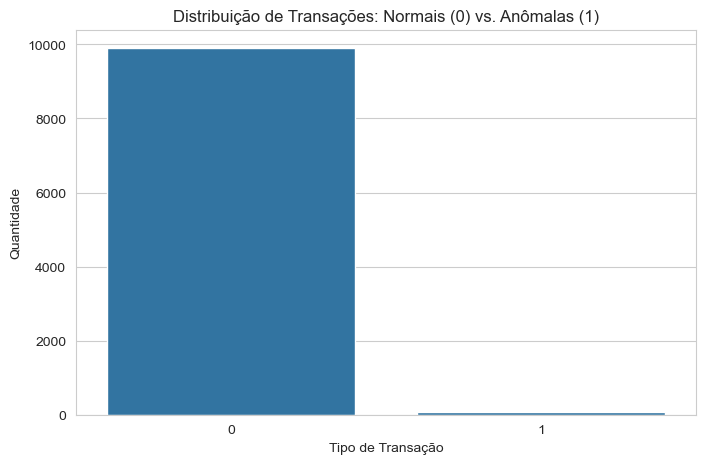

In [11]:
if 'df' in globals():
  print("\n\n===== Informações Gerais do Dataset =====")
  df.info()

  print("\n\n===== Resumo Estatístico (Colunas Numéricas) =====")
  print(df.describe())

  # Verificando a distribuição das flag "Anomalia"
  print("\n\n===== Distribuição de Transações Normais vs. Anômalas =====")
  print(df['Anomalia'].value_counts())

  # Visualizando essa distribuição com um gráfico de barras
  plt.figure(figsize=(8, 5))
  sns.countplot(x='Anomalia', data=df)
  plt.title('Distribuição de Transações: Normais (0) vs. Anômalas (1)')
  plt.xlabel('Tipo de Transação')
  plt.ylabel('Quantidade')
  plt.show()

"""" 
Nessa etapa foi realizada uma rápida análise exploratória para entendermos melhor os dados (seus tipos), e verificarmos como está distríbuida a variável
de interesse parao projeto

Nota: Ao clonar o repositório no git, você pode pode notar uma diferença entre o dataset presente no repositório do github e o que está no kaggle (adição de 2 colunas e remoção de alguns
registros). Para reprodução do projeto da forma pretendida é recomendado que você substitua o dataset do github pelo original do kaggle (link no readme)
""""

# Pré-Processamento e Eng. de Features

In [3]:
if 'df' in globals():

    df['DataHora_dt'] = pd.to_datetime(df['DataHora'], errors='coerce')

    # Remover linhas NaN
    df.dropna(subset=['DataHora_dt'], inplace=True)

    df['Hora'] = df['DataHora_dt'].dt.hour

    df['DiaDaSemana'] = df['DataHora_dt'].dt.dayofweek

    # Exibindo as colunas originais e as novas para verificação
    print(df[['DataHora', 'Hora', 'DiaDaSemana']].head())

""""
Nessa etapa, para possibilitar o modelo a trabalhar com a data de forma válida, foi feita essa separação da data em dias da semana e horários (coisa que
o pandas fez muito bem). Pode se notar também a remoção/limpeza de alguns registros que não representavam números (ruídos nos dados, algo bem comum no dia a dia),
esses registros se presentes dão alguns erros impedindo o correto andamento da análise.

"""



===== Novas colunas 'Hora' e 'DiaDaSemana' criadas com sucesso! =====
              DataHora  Hora  DiaDaSemana
0  2025-06-26 21:07:56    21            3
1  2025-06-23 17:47:56    17            0
2  2025-06-27 15:58:56    15            4
3  2025-07-15 13:59:56    13            1
4  2025-06-23 06:19:56     6            0


# Análise aprofundada + visualização

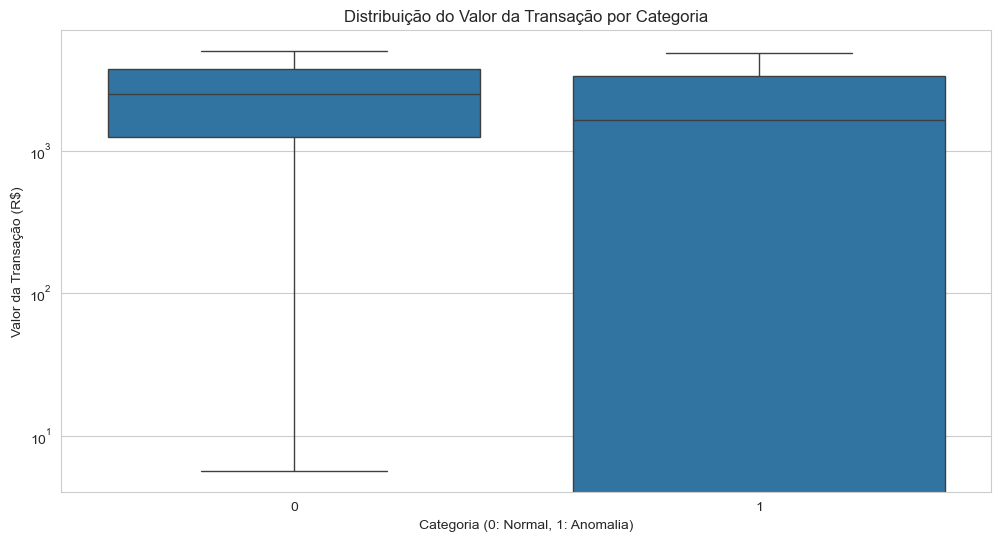

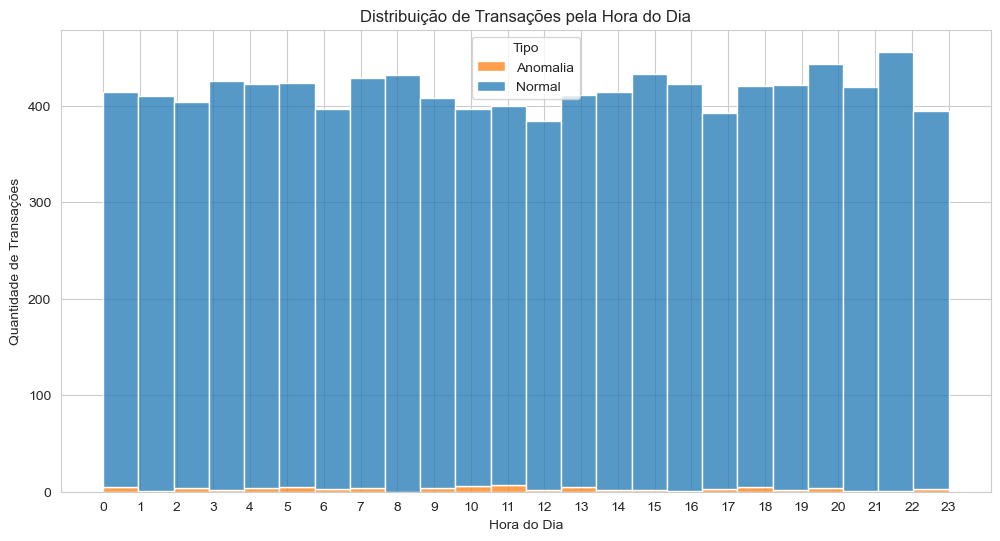

In [12]:
if 'df' in globals():

    sns.set_style("whitegrid")

    # Comparação do VALOR da transação 
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Anomalia', y='Valor', data=df)
    plt.title('Distribuição do Valor da Transação por Categoria')
    plt.xlabel('Categoria (0: Normal, 1: Anomalia)')
    plt.ylabel('Valor da Transação (R$)')

    # Usando escala logarítmica para melhor visualização
    plt.yscale('log')
    plt.show()

    # Comparação da HORA da transação
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='Hora', hue='Anomalia', multiple='stack', bins=24)
    plt.title('Distribuição de Transações pela Hora do Dia')
    plt.xlabel('Hora do Dia')
    plt.ylabel('Quantidade de Transações')
    plt.xticks(range(0, 24)) 
    plt.legend(title='Tipo', labels=['Anomalia', 'Normal'])
    plt.show()

"""
Nessa visualização, tem-se um foco maior em duas "perguntas": como as transações anômalas e não-anômalas estão distribuidas pelo valor, e como as mesmas
se distribuem nas horas do dia.

No gráfico boxplot, podemos observar que as transações normais estão bem mais concentradas do que as anômalas, esta característica dos dados poderia ter passado
despercebida se fossemos considerar algum "senso comum" de que transações fraudulentas costumam ser somente de valor exorbitante, unindo essa informação, juntamente 
com a distribuição até bem uniforme das anomalias ao longo das horas observadas no segundo gráfico, é prova cabal da importância de se realizar análises usando 
técnicas consideradas "exatas", não se apoiando somente em conhecimento dito empírico.
"""

# Preparação dos Dados Para o Modelo

In [5]:
from sklearn.model_selection import train_test_split

if 'df' in globals():
  features = ['Valor', 'Hora', 'DiaDaSemana']
  target = 'Anomalia'

  X = df[features]
  y = df[target]

  X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

  print(f"Formato dos dados de treino (X_train): {X_train.shape}")
  print(f"Formato dos dados de teste (X_test): {X_test.shape}")

  print("\nDistribuição do alvo no conjunto de treino:")
  print(y_train.value_counts(normalize=True))

  print("\nDistribuição do alvo no conjunto de teste:")
  print(y_test.value_counts(normalize=True))

""""
Aqui seguimos com um procedimento bem padrão para projetos de machine learning, que é a separação dos dados em dados de treino e dados de teste, afinal, 
precisamos garantir que após o treino o modelo possa lidar com entradas até então não vistas.

"""

Formato dos dados de treino (X_train): (7980, 3)
Formato dos dados de teste (X_test): (1996, 3)

Distribuição do alvo no conjunto de treino:
Anomalia
0    0.992356
1    0.007644
Name: proportion, dtype: float64

Distribuição do alvo no conjunto de teste:
Anomalia
0    0.992485
1    0.007515
Name: proportion, dtype: float64


# Treinando o Model de ML

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

if 'X_train' in globals():

  model = LogisticRegression(random_state=42)
  model.fit(X_train, y_train)

  #Realizar previsões nos dados de teste
  y_pred = model.predict(X_test)

"""
A partir daqui, começa uma etapa bem interessante do projeto, o treinamento do modelo e, a partir da avaliação, conclusões quanto à verdadeira eficiência dele.

Vale ressaltar que o modelo escolhido foi o de Regressão Logistica, que explicando de forma leiga, tenta traçar uma separação matemática entre os dados, classificando-os
baseado aonde os dados se encontram na divisão (a princípio perfeito para nosso projeto).
"""

'\nA partir daqui, começa uma etapa bem interessante do projeto, o treinamento do modelo e, a partir da avaliação, conclusões quanto à verdadeira eficiência dele.\n\nVale ressaltar que o modelo escolhido foi o de Regressão Logistica, que explicando de forma leiga, tenta traçar uma separação matemática entre os dados, classificando-os\nbaseado aonde os dados se encontram na divisão (a princípio perfeito para nosso projeto).\n'

# Avaliando o Modelo de ML



===== Matriz de Confusão =====
[[1981    0]
 [  15    0]]


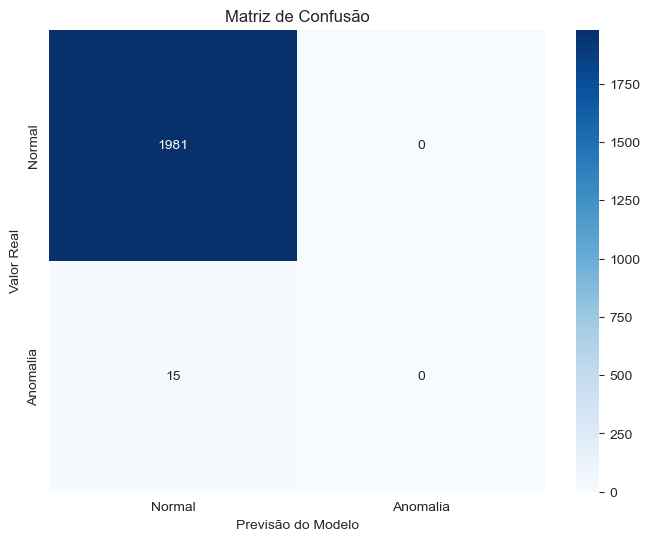



===== Relatório de Classificação =====
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.00      0.00      0.00        15

    accuracy                           0.99      1996
   macro avg       0.50      0.50      0.50      1996
weighted avg       0.99      0.99      0.99      1996



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
if 'model' in globals():
  print("\n\n===== Matriz de Confusão =====")
  conf_matrix = confusion_matrix(y_test, y_pred)
  print(conf_matrix)

  #vizualizando matriz de confusão
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomalia'],
                yticklabels=['Normal', 'Anomalia'])
  plt.xlabel('Previsão do Modelo')
  plt.ylabel('Valor Real')
  plt.title('Matriz de Confusão')
  plt.show()

  print("\n\n===== Relatório de Classificação =====")
  class_report = classification_report(y_test, y_pred)
  print(class_report)

"""
Utilizando uma Matriz de confusão, pode-se notar que o desequilíbrio entre as frequências das anomalias e as não-anomalias, fez com que nosso modelo ficasse
"preguiçoso" por conta da raridade das anomalias. Podemos ver que ele acertou todas as transações normais, e em contrapartida, não conseguiu acerta nenhuma anomalia sequer.

Nota: talvez apareça um erro ao excutar essa célula, esse erro não é um impeditivo para executar esse trecho de código, e sim um aviso de que a precisão de acerto
para a nossa variavel alvo é 0, indicando algo de muito errado com o modelo.
"""

# Treinando um Modelo Balanceado

In [17]:
if 'X_train' in globals():

    #balanceando os pesos
    model = LogisticRegression(random_state=42, class_weight='balanced')

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

"""
Nessa etapa foi aplicado ao modelo de regressão logistica o parametro "class_weight='balanced'", que pesa os dados de forma inversamente proporcional a frequência deles.

Se pudessemos simplificar esse balanceamento seria como se estivessemos dizendo para o modelo "é melhor que você afirme que uma transação normal é anômala
do que correr o risco de deixar uma anômala passe como normal.
"""

    

'\nNessa etapa foi aplicado ao modelo de regressão logistica o parametro "class_weight=\'balanced\'", que pesa os dados de forma inversamente proporcional a frequência deles.\n\nSe pudessemos simplificar esse balanceamento seria como se estivessemos dizendo para o modelo "é melhor que você afirme que uma transação normal é anômala\ndo que correr o risco de deixar uma anômala passe como normal.\n'

# Avaliando Modelo ML com pesos Balanceados



===== Matriz de Confusão =====
[[1079  902]
 [   2   13]]


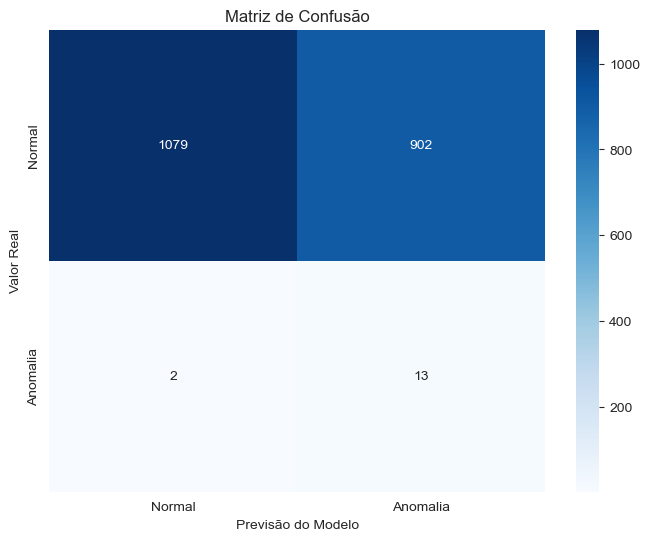



===== Relatório de Classificação =====
              precision    recall  f1-score   support

           0       1.00      0.54      0.70      1981
           1       0.01      0.87      0.03        15

    accuracy                           0.55      1996
   macro avg       0.51      0.71      0.37      1996
weighted avg       0.99      0.55      0.70      1996



In [18]:
if 'model' in globals():
  print("\n\n===== Matriz de Confusão =====")
  conf_matrix = confusion_matrix(y_test, y_pred)
  print(conf_matrix)

  #vizualizando matriz de confusão
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomalia'],
                yticklabels=['Normal', 'Anomalia'])
  plt.xlabel('Previsão do Modelo')
  plt.ylabel('Valor Real')
  plt.title('Matriz de Confusão')
  plt.show()

  print("\n\n===== Relatório de Classificação =====")
  class_report = classification_report(y_test, y_pred)
  print(class_report)


"""
A primeira vista, podemos pensar "bom, é isso, o modelo acertou 13 das 15 anomalias, é práticamente um gênio da análise de fraudes" caindo em uma armadilha nada sutíl para os olhos mais atentos.

Realmente, o modelo acertou boa parte das anomalias, porém ele também "afirmou" que 902 transações normais eram anomalias, é como um detetive desesperado que 
acusa qualquer um de ser o culpado, apesar das chances de acertar crescerem drásticamente, ele mais errou do que acertou.

Isso é completamente inviável para o mundo real uma vez que, se isto fosse o sistema de um banco, o responsável por análisar essas anomalias precisaria analisar
902 + 13 registros, só pra encontrar 13, completamente fora de cogitação.

É apartir deste ponto onde a abordagem mudou, ao perceber que o modelo de Regressão logistica é muito simples para um problema muito complexo que é detecção de fraude.

"""

# Mudança de abordagem - Treinando e Avaliando um Modelo de ML Random Forest



===== Matriz de Confusão (Random Forest) =====
[[1980    1]
 [   7    8]]


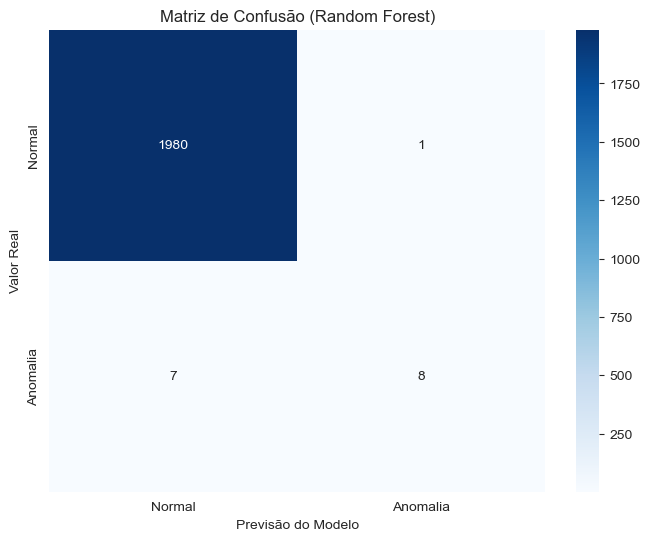



===== Relatório de Classificação (Random Forest) =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       0.89      0.53      0.67        15

    accuracy                           1.00      1996
   macro avg       0.94      0.77      0.83      1996
weighted avg       1.00      1.00      1.00      1996



In [19]:
from sklearn.ensemble import RandomForestClassifier

if 'X_train' in globals():
  model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
  model_rf.fit(X_train, y_train)

  y_pred_rf = model_rf.predict(X_test)

  print("\n\n===== Matriz de Confusão (Random Forest) =====")
  conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
  print(conf_matrix_rf)

  # Visualizando a matriz
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomalia'],
                yticklabels=['Normal', 'Anomalia'])
  plt.xlabel('Previsão do Modelo')
  plt.ylabel('Valor Real')
  plt.title('Matriz de Confusão (Random Forest)')
  plt.show()

  print("\n\n===== Relatório de Classificação (Random Forest) =====")
  class_report_rf = classification_report(y_test, y_pred_rf)
  print(class_report_rf)

"""
Por fim, O modelo utilizado foi o Random Forest, que ao invés de aprende uma única regra para separa os dados, utiliza de uma matemática mais robusta para criar
fluxogramas de regras.

Ao observarmos a matriz agora, vemos um resultado bem mais palpável para ser utilizado no mundo real. O modelo nos  indicou mais da metade das anomalias de forma correta,
isso acusando apenas uma transação normal como anomalia, reduzindo a carga de trabalho de alguém que for análisar essas transações.

Quando vemos esses resultados, temos que ter a capacidade de interpretar o fato do que é mais viável de se transpor para a vida real e o "erro aceitável", uma vez
que não existe modelo matemática que preveja, analise ou classifique de forma perfeita.
"""